In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = forest_fires_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'])
data_5 = data_processor.log_transform(data_4)

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [3]:
data_5

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,0.357375,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.000000
1,1.007337,-0.243765,1.109046,-1.089853,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.000000
2,1.007337,-0.243765,1.109046,0.839784,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.000000
3,1.439531,1.382383,-1.966538,0.357375,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.000000
4,1.439531,1.382383,-1.966538,1.322193,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289244,-1.056839,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,2.006871
513,-1.153631,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,4.012592
514,1.007337,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,2.498152
515,-1.585825,-0.243765,0.230308,0.839784,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,0.000000


In [4]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [5]:
data = data_train.to_numpy()
X_train = data[:,:-1]
y_train = data[:,-1:]

In [6]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-1]
y_val = data_test[:,-1:]

In [7]:
y_val[0]

array([0.])

In [8]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=50,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,5000,0.000001)

Epoch 0/5000, Train MSE: 2203.471199826842, Val MSE: 12174.026372081433
Epoch 100/5000, Train MSE: 2193.630592694433, Val MSE: 12156.48976669479
Epoch 200/5000, Train MSE: 2184.549223483851, Val MSE: 12140.006093368238
Epoch 300/5000, Train MSE: 2176.1389105788744, Val MSE: 12124.45008739644
Epoch 400/5000, Train MSE: 2168.2932113922407, Val MSE: 12109.654299731481
Epoch 500/5000, Train MSE: 2160.865593716577, Val MSE: 12095.362757963361
Epoch 600/5000, Train MSE: 2153.6331067285955, Val MSE: 12081.15052847052
Epoch 700/5000, Train MSE: 2146.2354929912326, Val MSE: 12066.283909487516
Epoch 800/5000, Train MSE: 2138.0665875024624, Val MSE: 12049.466044730552
Epoch 900/5000, Train MSE: 2128.0265164913853, Val MSE: 12028.269338115553
Epoch 1000/5000, Train MSE: 2113.820379841148, Val MSE: 11997.49881416379
Epoch 1100/5000, Train MSE: 2091.818708032098, Val MSE: 11947.123858429348
Epoch 1200/5000, Train MSE: 2067.4537956026184, Val MSE: 11880.728393645612
Epoch 1300/5000, Train MSE: 2053.5

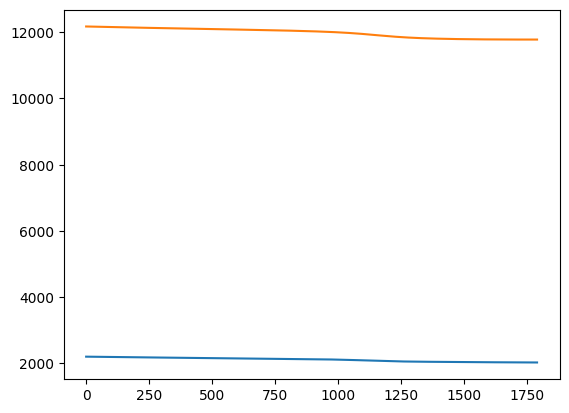

In [9]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [10]:
linear = LinearNetwork(config)

losses = linear.linear_regression(X_train,y_train,X_val,y_val)

Epoch 0/1000, Training MSE: 2203.1769195093266, Validation MSE: 12158.83442723186
Epoch 100/1000, Training MSE: 2016.038195324204, Validation MSE: 11787.948641354657
Epoch 200/1000, Training MSE: 2009.2282229360674, Validation MSE: 11760.589532237933
Epoch 300/1000, Training MSE: 2007.5147991416732, Validation MSE: 11758.040824066798
No improvement in validation MSE for 10 epochs, stopping training.
